In [201]:
#importing liabraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

### Reading and understanding data

In [202]:
#reading data.
auto_data=pd.read_csv(r'D:\Data Science\ML\assignment\project 2\AutoData (1).csv')
auto_data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [203]:
auto_data.shape

(205, 25)

In [204]:
auto_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [205]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Data PreProcessing

In [206]:
#counting unique values for make feature.
auto_data.make.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: make, Length: 147, dtype: int64

* As we can see carname and brands are written together so we have to split carnames and brand names from each other
* we can do this by using lambda function.

In [207]:
#seprating carname from its brand_name.
car_name=auto_data['make'].apply(lambda x:x.split(" ")[0])
car_name

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [208]:
#creating brand_name feature in dataset.
auto_data['brand_name']=car_name
auto_data['brand_name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: brand_name, dtype: int64

* After separating carname from brand we counted values for each brand name car so we found that we have many duplicate values so will fix this duplicate values from dataset. 

In [209]:
#updating values.
#volkswagon
auto_data.loc[(auto_data['brand_name']=='vw')|(auto_data['brand_name']=='vokswagen'),'brand_name']='volkswagen'
#porsche
auto_data.loc[(auto_data['brand_name']=='porcshce'),'brand_name']='porsche'
#toyota
auto_data.loc[(auto_data['brand_name']=='toyouta'),'brand_name']='toyota'
#nissan
auto_data.loc[(auto_data['brand_name']=='Nissan'),'brand_name']='nissan'
#mazda
auto_data.loc[(auto_data['brand_name']=='maxda'),'brand_name']='mazda'

auto_data['brand_name'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand_name, dtype: int64

* We merged duplicate values with the original values and got the final valu count for each brand_name.
* So, now we don't need make feature so we can drop this feature from dataset.

In [210]:
#dropping make feature from dataset.
auto_data=auto_data.drop('make',axis=1)

In [211]:
#verifying data.
auto_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Data visualization

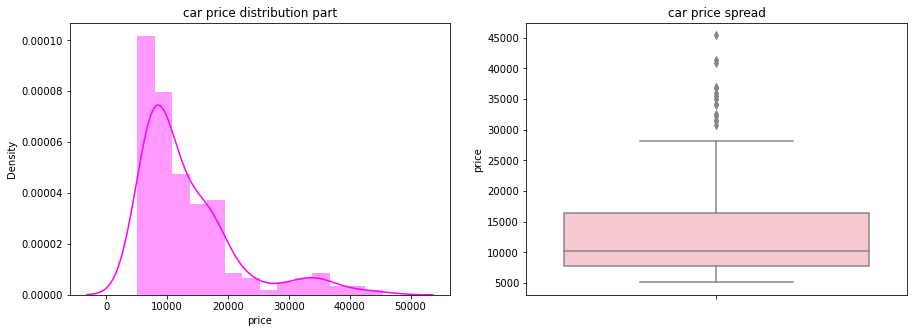

In [212]:
#ploting graphs to check targate variable.
plt.figure(figsize=(15,5))

#ploting distplot for targate variable.
plt.subplot(1,2,1)
sns.distplot(auto_data.price,color="magenta")
plt.title('car price distribution part')

#plotting boxplot to see car price spread.
plt.subplot(1,2,2)
sns.boxplot(y=auto_data.price,color='pink')
plt.title("car price spread")

plt.show()

### Inference :
* The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
* There is a significant difference between the mean and the median of the price distribution.

In [213]:
#understanding targate variable.
auto_data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

* The data points are far spread out from the mean, which indicates a high variance in the car prices.(75% of the prices are below 16,500, whereas the remaining 15% are between 16,500 and 45,400.)

### Visualization of categorical data

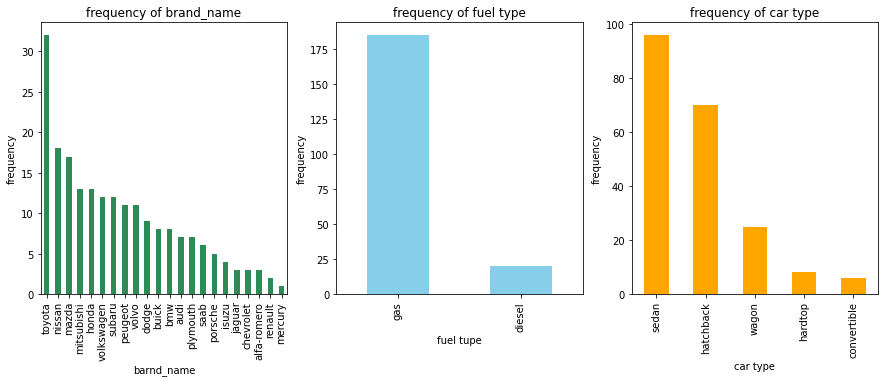

In [214]:
#visualization of categorical data.
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
graph=auto_data.brand_name.value_counts().plot(kind='bar',color='seagreen')
plt.title('frequency of brand_name' )
graph.set(xlabel='barnd_name',ylabel='frequency')

plt.subplot(1,3,2)
graph=auto_data.fueltype.value_counts().plot(kind='bar',color='skyblue')
plt.title('frequency of fuel type' )
graph.set(xlabel='fuel tupe',ylabel='frequency')

plt.subplot(1,3,3)
graph=auto_data.carbody.value_counts().plot(kind='bar',color='orange')
plt.title('frequency of car type' )
graph.set(xlabel='car type',ylabel='frequency')

plt.show()

#### Insight :
* Toyota seemed to be favored car company.
* Number of gas fueled cars are more than diesel.
* sedan is the top car type prefered.

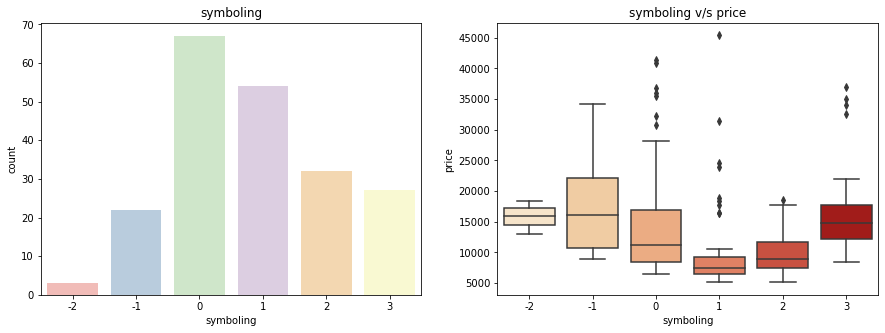

In [215]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(auto_data.symboling,palette=('Pastel1'))
plt.title('symboling')

plt.subplot(1,2,2)
sns.boxplot(x=auto_data.symboling,y=auto_data.price,palette='OrRd',)
plt.title('symboling v/s price')

plt.show()

#### Obeservations- :
* It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
* The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it * * seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

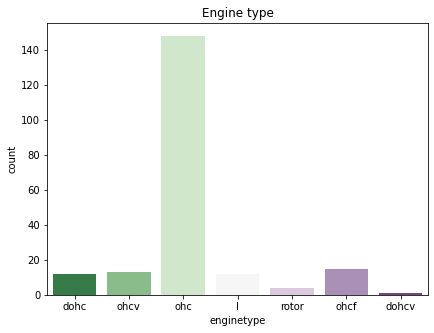

In [216]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(auto_data.enginetype,palette=('PRGn_r'))
plt.title('Engine type')
plt.show()

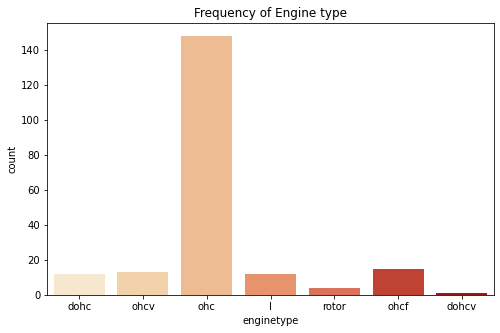

Text(0.5, 1.0, 'Engine Type v/s Average Price')

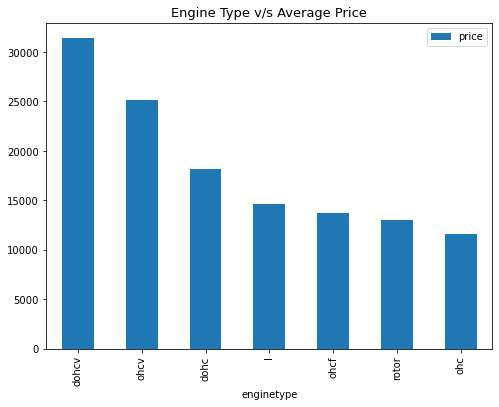

In [217]:
plt.figure(figsize=(8,5))
plt.title('Frequency of Engine type')
sns.countplot(auto_data.enginetype,palette=("OrRd"))

plt.show()

data = pd.DataFrame(auto_data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
data.plot.bar(figsize=(8,6))
plt.title('Engine Type v/s Average Price',fontsize=13)

#### Observation :
* ohc Engine type seems to be most favored type.
* ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

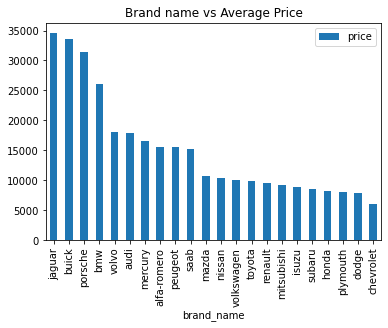

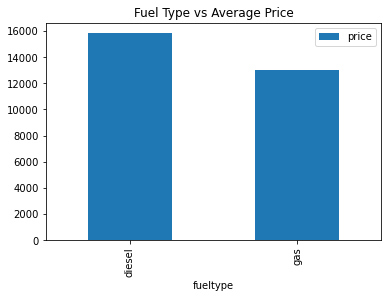

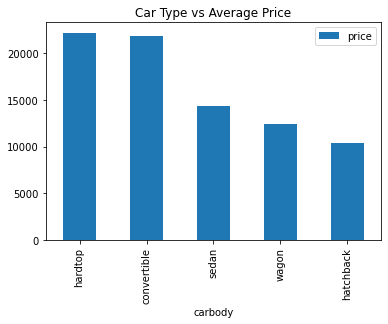

In [218]:
#verifying avg price with diff variable.
#plt.figure(figsize=(25, 6))

df = pd.DataFrame(auto_data.groupby(['brand_name'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand name vs Average Price')
plt.show()

df = pd.DataFrame(auto_data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(auto_data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Observation :
* Jaguar and Buick seem to have highest average price.
* diesel has higher average price than gas.
* hardtop and convertible have higher average price.

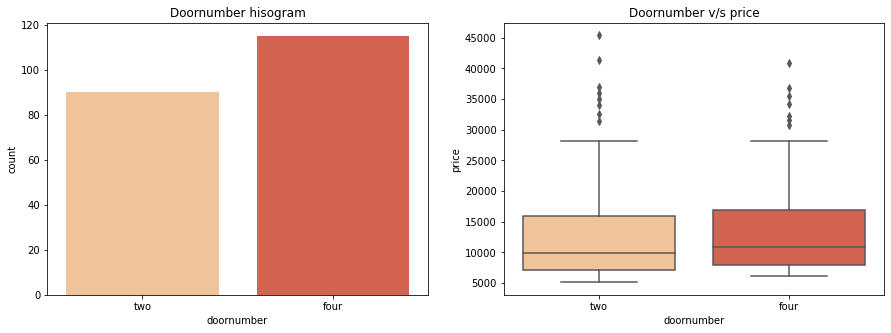

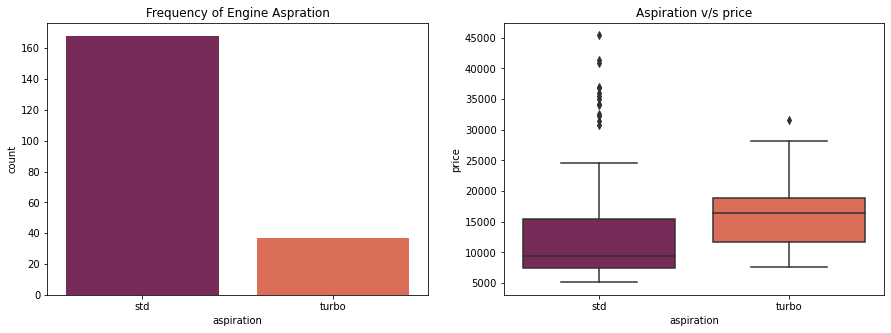

In [219]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Doornumber hisogram')
sns.countplot(auto_data.doornumber,palette=("OrRd"))

plt.subplot(1,2,2)
sns.boxplot(x=auto_data.doornumber,y=auto_data.price,palette='OrRd',)
plt.title('Doornumber v/s price')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Frequency of Engine Aspration')
sns.countplot(auto_data.aspiration,palette=("rocket"))

plt.subplot(1,2,2)
sns.boxplot(x=auto_data.aspiration,y=auto_data.price,palette='rocket')
plt.title('Aspiration v/s price')

plt.show()

#### Observation :
* doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
* It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

In [220]:
#creating function for remaining categorical data v/s price.
def count_plt(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+'histogram')
    sns.countplot(auto_data[x],palette=('autumn'))
    plt.subplot(4,2,(fig+1))
    plt.title(x+'v/s price')
    sns.boxplot(x=auto_data[x],y=auto_data.price,palette=('autumn_r'))
    

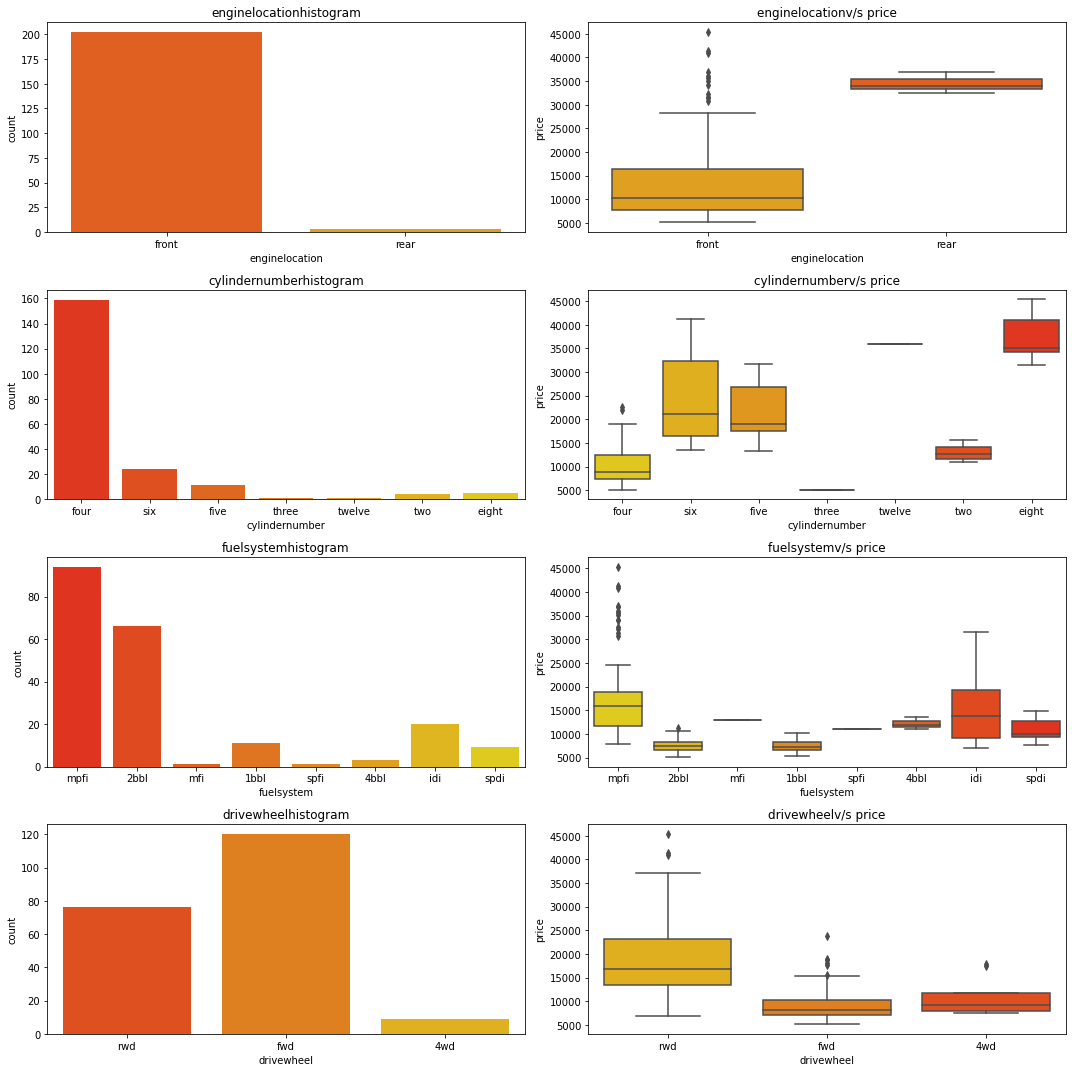

In [221]:
plt.figure(figsize=(15,15))

count_plt('enginelocation', 1)
count_plt('cylindernumber', 3)
count_plt('fuelsystem', 5)
count_plt('drivewheel', 7)

plt.tight_layout()

#### Observation:
* Very few datapoints for enginelocation categories to make an inference.
* Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
* mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
* A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

### Numerical Data Analysis

In [222]:
#creating dataset for numerical features only.
num_data=auto_data.select_dtypes(include=['float64','int64'])
num_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


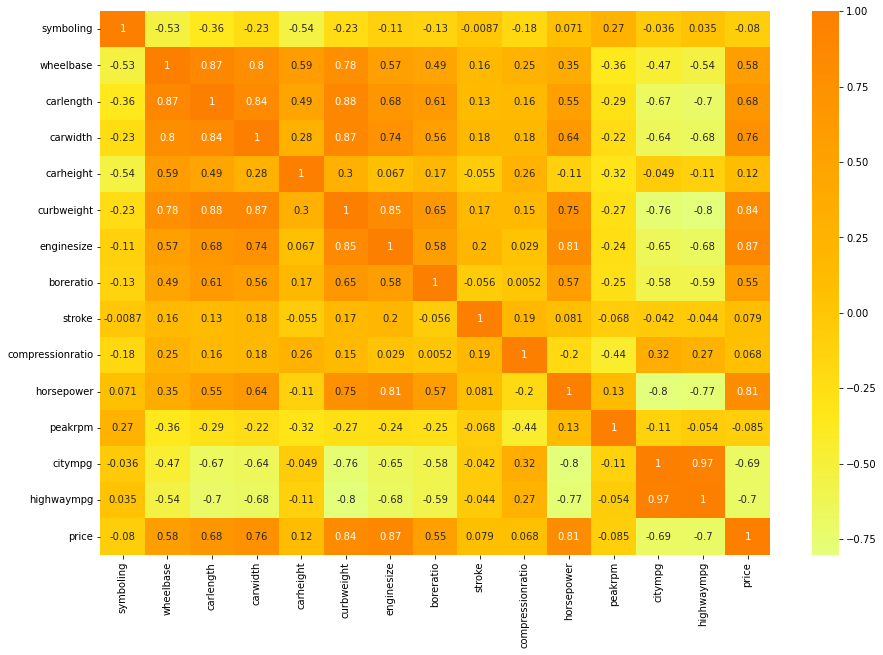

In [223]:
#creating heatmap for numerical data analysis.
plt.figure(figsize=(15,10))
sns.heatmap(auto_data.corr(),annot=True,cmap='Wistia')
plt.show()

#### Observation:
* Positive corr:Price is highly correlated with curbweight,horsepower,carwidth,enginesize.
* Negative corr:Price negatively correlated with citympg and highwaympg which means that low priced cars have mostly highmpg.

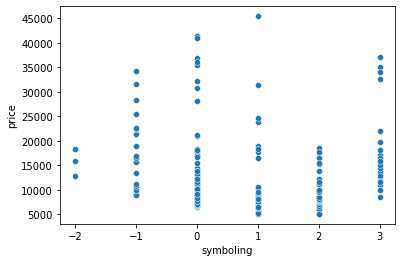

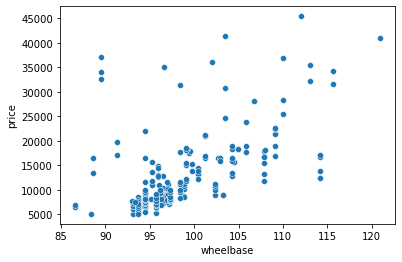

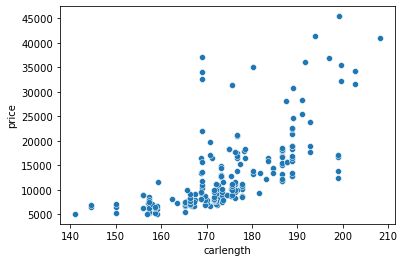

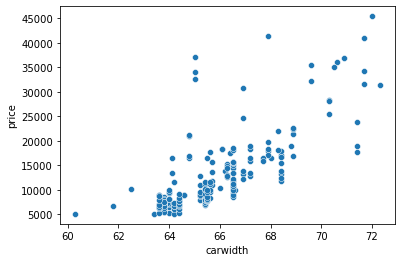

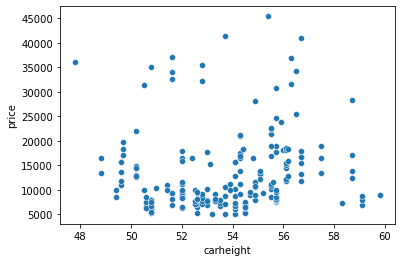

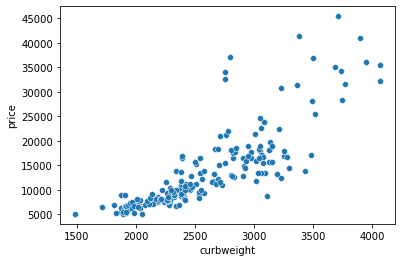

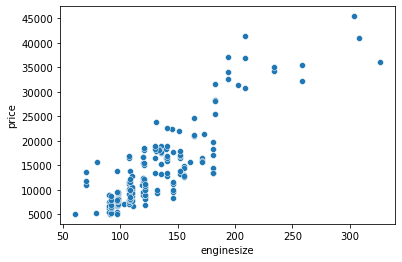

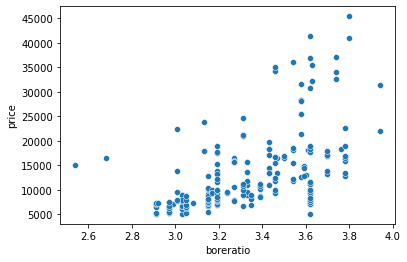

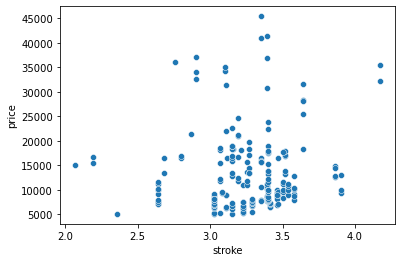

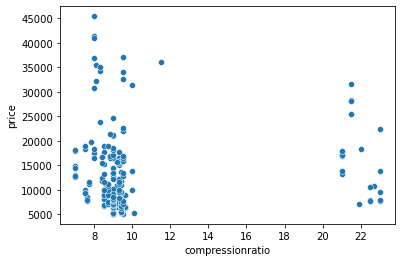

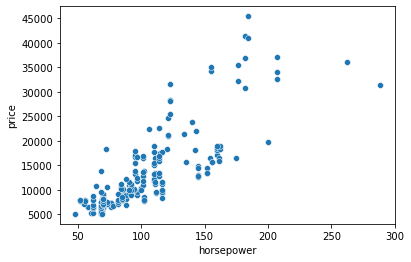

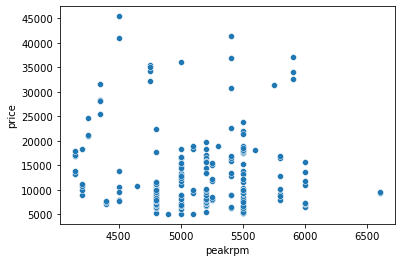

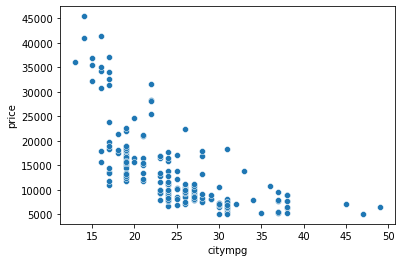

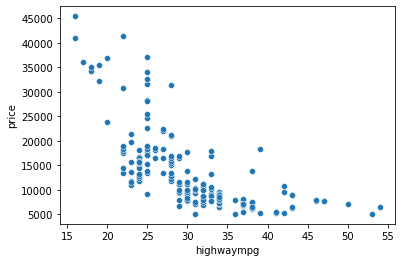

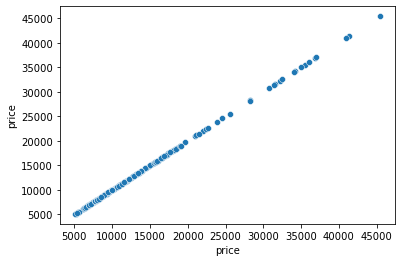

In [224]:
#checking lenearity of features.
for i,column in enumerate (num_data.columns):
    plt.figure(i)
    sns.scatterplot(x=num_data[column],y=num_data['price'])

* From above plots we can say that features like 'carwidth','curbweight','enginesize','horsepower','boreratio have linear relation with targate variable i.e. price.
* Features like 'citympg','highwaympg' have negative relation with targate variable i.e. price.
* Other features don't show any relation with targate variable price. 

In [225]:
#creating new feature.
auto_data['fuel_eco']=(0.55*auto_data['citympg'])+(0.45*auto_data['highwaympg'])

In [226]:
#creating bins for brand_name.
auto_data['price']=auto_data['price'].astype('int')
temp=auto_data.copy()
table=temp.groupby(['brand_name'])['price'].mean()
temp=temp.merge(table.reset_index(),how='left',on='brand_name')
bins=[0,10000,20000,40000]
auto_data_bin=['Budget','Medium','Highend']
auto_data['car_range']=pd.cut(temp['price_y'],bins,right=False,labels=auto_data_bin)
auto_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name,fuel_eco,car_range
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


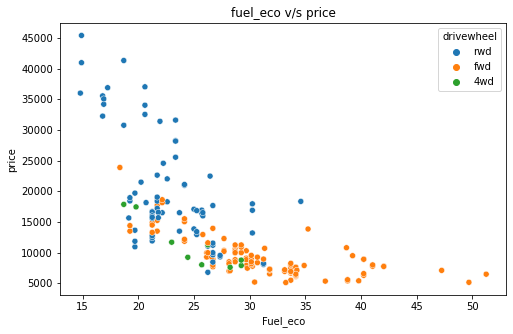

In [227]:
#plotting graph for fueleco variable.
plt.figure(figsize=(8,5))

plt.title('fuel_eco v/s price')
sns.scatterplot(x=auto_data['fuel_eco'],y=auto_data['price'],hue=auto_data['drivewheel'])
plt.xlabel('Fuel_eco')
plt.ylabel('price')

plt.show()

#### Observation :
* fueleconomy has an obvios negative correlation with price and is significant.

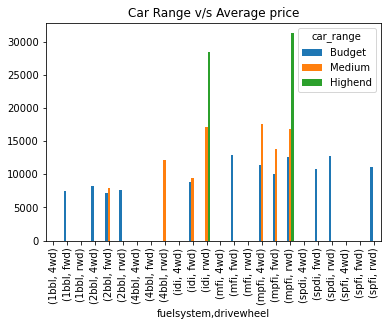

In [228]:
#checking correlation.
df=pd.DataFrame(auto_data.groupby(['fuelsystem','drivewheel','car_range'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range v/s Average price')
plt.show()

#### Observation :
* High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

From all analysis of numerical and categorical data we are able to figure out some important feature to build model that features are
* curbweight
* carwidth
* carlenght
* enginetype
* fueltype
* wheelbase
* drivewheel
* fuel_eco
* aspiration
* cylindernumber
* enginesize
* horsepower
* boreratio
* car_range
* carbody

In [240]:
model_data=auto_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fuel_eco', 'carlength','carwidth', 'car_range']]
model_data.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fuel_eco,carlength,carwidth,car_range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


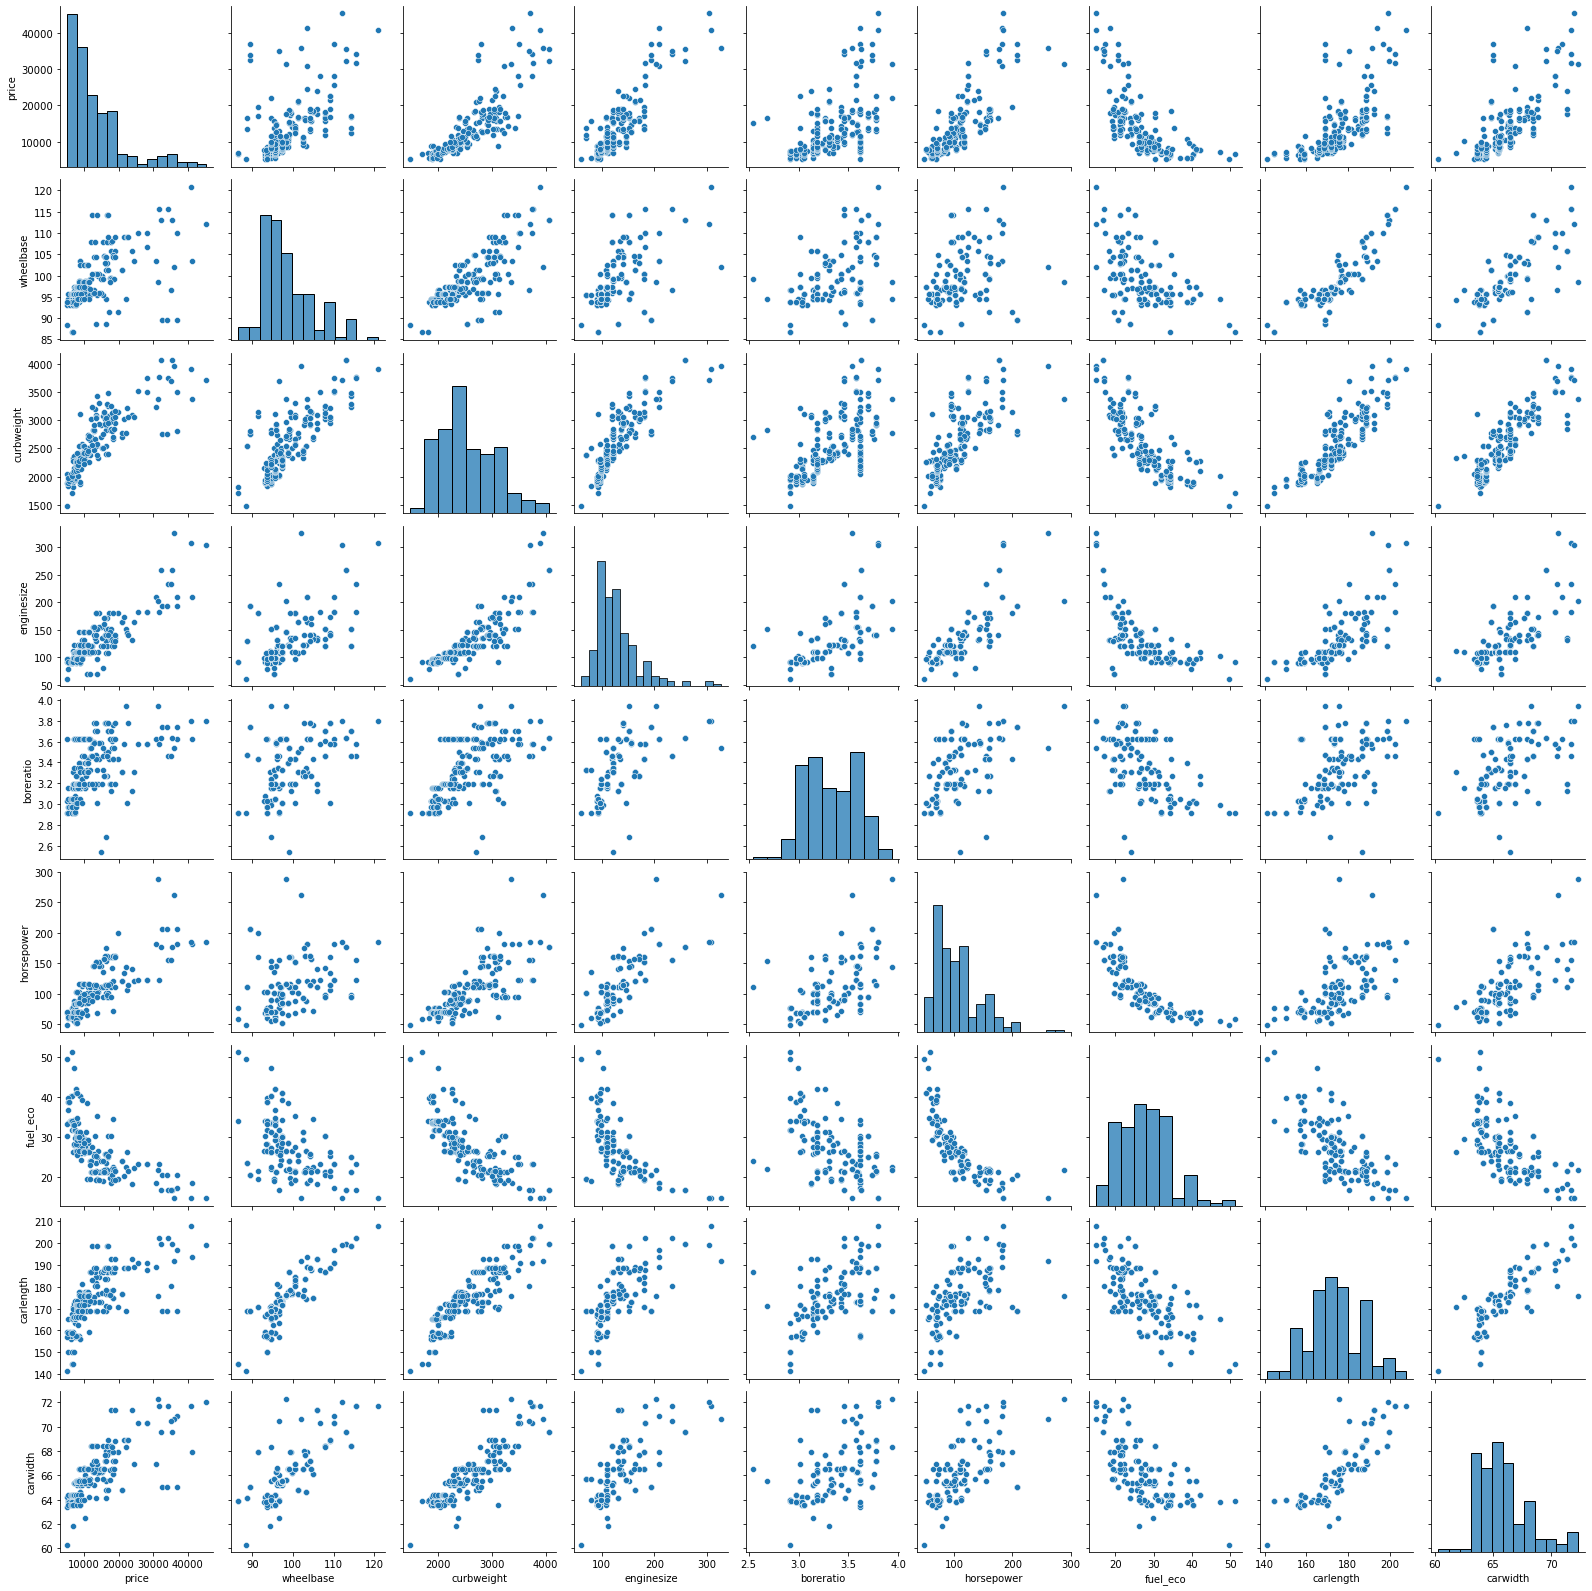

In [230]:
#checking relation with pairplot.
sns.pairplot(model_data)

### Variable encoding using Dummies variable

In [241]:
#defining function for dummies value.
def dummy(x,df):
    temp=pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

In [242]:
#function calling.
model_data=dummy('fueltype',model_data)
model_data=dummy('aspiration',model_data)
model_data=dummy('carbody',model_data)
model_data=dummy('drivewheel',model_data)
model_data=dummy('enginetype',model_data)
model_data=dummy('cylindernumber',model_data)
model_data=dummy('car_range',model_data)

In [243]:
model_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuel_eco,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


### Train-Test split

In [238]:
#spliting data into train and test.
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test=train_test_split(model_data,train_size=0.7,test_size=0.3,random_state=100)

#### Feature Scalling

In [239]:
#printing train data.
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuel_eco,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,7609,93.7,2191,98,2.97,68,34.15,167.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,22.60,168.9,68.3,1,...,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,19.25,188.8,67.2,1,...,0,0,0,1,0,0,0,0,1,0


In [244]:
#dividing data into x & y.
y_train=df_train.pop('price')
X_train=df_train

### Model Building

In [172]:
#importing liabraries.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
#data modeling.
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,10)
rfe=rfe.fit(X_train,y_train)

In [174]:
X_train.columns[rfe.support_]

Index(['hatchback', 'sedan', 'wagon', 'fwd', 'dohcv', 'five', 'four', 'twelve',
       'two', 'Highend'],
      dtype='object')

In [175]:
rfe1=X_train[X_train.columns[rfe.support_]]
rfe1.head()

,hatchback,sedan,wagon,fwd,dohcv,five,four,twelve,two,Highend
122,0,1,0,1,0,0,1,0,0,0
125,1,0,0,0,0,0,1,0,0,1
166,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
199,0,0,1,0,0,0,1,0,0,0


In [176]:
#defining function to work with multiple model.
def model_building(X,y):
    X=sm.add_constant(X)
    lr=sm.OLS(y,X).fit()
    print(lr.summary())
    return X

In [177]:
#defining function to check VIF.
def vif(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return (vif)

#### Model-1

In [178]:
#assigning new variable.
X_train_new=model_building(rfe1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     57.34
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           3.70e-43
Time:                        11:37:26   Log-Likelihood:                -1364.2
No. Observations:                 143   AIC:                             2750.
Df Residuals:                     132   BIC:                             2783.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.105e+04   1604.142     13.120      0.0

p-value of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [179]:
#dropping insignificant variable.
X_train_new=X_train_new.drop(['twelve'],axis=1)

#### Model-2

In [180]:
#bulding model after dropping 1 feature.
X_train_new=model_building(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     62.60
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.72e-43
Time:                        11:37:29   Log-Likelihood:                -1365.7
No. Observations:                 143   AIC:                             2751.
Df Residuals:                     133   BIC:                             2781.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.103e+04   1614.539     13.027      0.0

In [182]:
#dropping insignificant variable.
X_train_new=X_train_new.drop(['fuel_eco'],axis=1)

### Model-3

In [91]:
#bulding model after dropping insignificant feature.
X_train_new=model_building(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           7.85e-72
Time:                        11:29:55   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [130]:
#Calculating vif.
vif(X_train_new)

,Features,VIF
0,const,29.99
2,sedan,5.79
1,hatchback,5.69
3,wagon,3.30
7,four,2.27
9,Highend,1.72
4,fwd,1.58
6,five,1.37
8,two,1.32
5,dohcv,1.09


### Model-4

In [183]:
#dropping insignificant variable.
X_train_new=X_train_new.drop(['curbweight'],axis=1)

In [94]:
#bulding model after dropping 1 feature.
X_train_new=model_building(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           4.70e-70
Time:                        11:30:00   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [95]:
vif(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


Dropping sedan due to high vif.

In [96]:
#bulding model after dropping 1 feature.
X_train_new=X_train_new.drop(['sedan'],axis=1)

### Model-5

In [97]:
#bulding model after dropping 1 feature.
X_train_new=model_building(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.68e-69
Time:                        11:30:05   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [98]:
vif(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


Dropping wagon due to high p-value.

In [99]:
#bulding model after dropping 1 feature.
X_train_new=X_train_new.drop(['wagon'],axis=1)

### Model-6

In [100]:
#bulding model after dropping 1 feature.
X_train_new=model_building(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.57e-70
Time:                        11:30:16   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [101]:
vif(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


In [102]:
#bulding model after dropping 1 feature.
X_train_new=X_train_new.drop(['dohcv'],axis=1)

In [103]:
#bulding model after dropping 1 feature.
X_train_new=model_building(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.04e-67
Time:                        11:30:32   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [104]:
vif(X_train_new)

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


### Error Analysis

In [184]:
lm=sm.OLS(y_train,X_train_new).fit()
train_price=lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

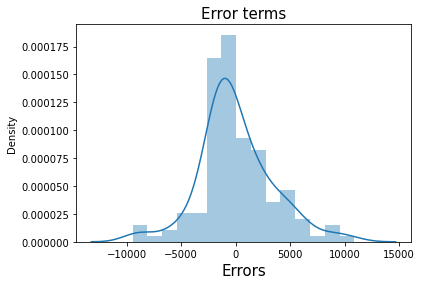

In [185]:
#plotting errors.
sns.distplot((y_train-train_price),bins=15)
plt.title('Error terms',fontsize=15)
plt.xlabel('Errors',fontsize=15)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [186]:
#test data.
y_test=df_test.pop('price')
X_test=df_test

In [187]:
#model prediction.
X_train_new=X_train_new.drop('const',axis=1)

In [188]:
#creating new test data.
X_test_new=X_test[X_train_new.columns]

In [189]:
#adding new constant to test.
X_test_new=sm.add_constant(X_test_new)

In [112]:
X_test_new

,const,horsepower,carwidth,hatchback,Highend
160,1.0,70,64.4,0,0
186,1.0,85,65.5,0,0
59,1.0,84,66.5,1,0
165,1.0,112,64.0,0,0
140,1.0,73,63.8,1,0
...,...,...,...,...,...
28,1.0,88,64.6,0,0
29,1.0,145,66.3,1,0
182,1.0,52,65.5,0,0
40,1.0,86,62.5,0,0


In [197]:
#predicting y.
y_pred=lm.predict(X_test_new)

In [198]:
#importing files.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7600291056358087

In [200]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     62.60
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.72e-43
Time:                        11:43:26   Log-Likelihood:                -1365.7
No. Observations:                 143   AIC:                             2751.
Df Residuals:                     133   BIC:                             2781.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.103e+04   1614.539     13.027      0.0

## End OF Project